In [1]:
import io
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = data.drop(['Id','SepalWidthCm','PetalLengthCm'], axis=1)
data.tail()

,SepalLengthCm,PetalWidthCm,Species
145,6.7,2.3,Iris-virginica
146,6.3,1.9,Iris-virginica
147,6.5,2.0,Iris-virginica
148,6.2,2.3,Iris-virginica
149,5.9,1.8,Iris-virginica


In [4]:
data['Species'] = data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':1})
data.head()

,SepalLengthCm,PetalWidthCm,Species
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0


In [5]:
X = data.drop('Species', axis=1)
y = data['Species']
X = X.values
y = y.values
print(type(y))
perm = np.random.permutation(150)
x_train, x_test = X[perm][20:], X[perm][:20]
y_train, y_test = y[perm][20:], y[perm][:20]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape) 

<class 'numpy.ndarray'>
(130, 2) (130,) (20, 2) (20,)


In [6]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
X = list(X)
Y = list(y)
x=[]
y=[]
for i,j in zip(X,Y):
    if j == 0 :
        x.append(list(i))
    else:
        y.append(list(i))
    
x1 = [item[0] for item in x]
x2 = [item[1] for item in x]
y1 = [item[0] for item in y]
y2 = [item[1] for item in y]
print(x_train.shape)

(130, 2)


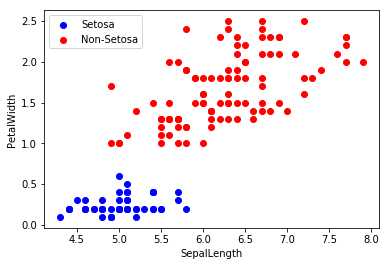

In [7]:
plt.scatter(x1 ,x2,color='blue')
plt.scatter(y1,y2,color='red')
plt.xlabel('SepalLength')
plt.ylabel('PetalWidth')
plt.legend(['Setosa','Non-Setosa'])

In [8]:
def sigmoid(yhat):
    return 1 / (1 + np.e**(-yhat))


In [9]:
def logistic_loss(y,y_hat):
    return -np.mean(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))

In [10]:
W = np.zeros((2,1))
print(W.shape)
learning_rate = 0.01

(2, 1)


In [11]:
m = len(y_train)
for epoch in range(5000):
    #print(x_train.shape, W.shape, b.shape)
    n,p = x_train.shape
    #print(n,p)
    b = np.zeros((n,1))
    Z = np.matmul(x_train, W) + b
    A = sigmoid(Z)
    loss = logistic_loss(y_train, A)
    dz = A - y_train
    dw = 1/m * np.matmul(x_train.T, dz)
    db = np.sum(dz)
    
    W = W - learning_rate * dw
    #b = b - learning_rate * dw
    
    if(epoch %100==0):
        print(loss)
    

0.6931471805599453
0.543958488824145
0.49525450414466615
0.45371591498428965
0.4181287597778101
0.3874665433528355
0.36088061628583257
0.3376780950657479
0.31729654348293757
0.2992800111944198
0.2832582633484637
0.26892959621685125
0.2560469829281445
0.24440706038934298
0.2338414352752798
0.22420983724137342
0.21539472403849003
0.20729702026509092
0.19983273913054736
0.1929302922463581
0.18652833667038363
0.1805740428740432
0.17502169385239122
0.16983154595114866
0.16496889755837305
0.16040332372808552
0.15610804394310257
0.15205939725311957
0.14823640444891853
0.14462040113753857
0.14119472885541673
0.13794447391504736
0.1348562456906012
0.13191798763427134
0.12911881557300514
0.12644887883737352
0.12389924057629648
0.12146177425602647
0.11912907386232462
0.11689437574683893
0.11475149040237834
0.11269474273275269
0.11071891961347104
0.10881922372960136
0.10699123283423284
0.10523086370139807
0.10353434015592633
0.101898164653471
0.10031909296004969
0.09879411154444262


In [12]:
W

array([[-0.58480343],
       [ 4.29086675]])

In [13]:
preds = []
for i in sigmoid(Z):
    if(i>0.5):
        preds.append(1)
    else:
        preds.append(0)

In [14]:
from sklearn.metrics import f1_score
f1_score(preds, y_train)

1.0

# Descision Boundary

In [15]:
data.iloc[:,2].ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Text(0,0.5,'PetalWidth')

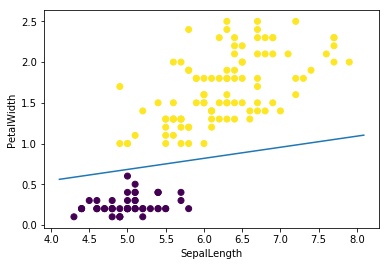

In [22]:
import matplotlib.pyplot as plt
plt.scatter(data.iloc[:,0], data.iloc[:,1], c = data.iloc[:,2].ravel())
ax = plt.gca()
xvals = np.array(ax.get_xlim()).reshape(-1,1)
yvals = -(xvals * W[0][0])/W[1][0]
plt.plot(xvals,yvals)
plt.xlabel('SepalLength')
plt.ylabel('PetalWidth')
#plt.legend(['Setosa','Non-Setosa'])

# Scikit Learn Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='liblinear',multi_class='ovr')
clf.fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
clf.predict(x_test)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [19]:
clf.predict_proba(x_test)

array([[0.00920253, 0.99079747],
       [0.21527507, 0.78472493],
       [0.01199384, 0.98800616],
       [0.89297551, 0.10702449],
       [0.070664  , 0.929336  ],
       [0.09039698, 0.90960302],
       [0.90082006, 0.09917994],
       [0.00190915, 0.99809085],
       [0.11362945, 0.88637055],
       [0.81774739, 0.18225261],
       [0.26965425, 0.73034575],
       [0.88885192, 0.11114808],
       [0.02948587, 0.97051413],
       [0.91498706, 0.08501294],
       [0.00168132, 0.99831868],
       [0.01478678, 0.98521322],
       [0.08365699, 0.91634301],
       [0.12709522, 0.87290478],
       [0.01459669, 0.98540331],
       [0.15597903, 0.84402097]])

In [20]:
clf.score(x_test, y_test)

1.0